In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Hyperparameters
latent_dim = 100
img_size = 28 * 28
batch_size = 128
g_lr = 0.0002
d_lr = 0.0002
num_epochs = 250
hidden_dim = 256

# check if MPS or CUDA is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda") if torch.cuda.is_available() else "cpu"
print("Using device: ", device)

Using device:  mps


In [3]:
# Transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

# Load the MNIST dataset
dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)


In [4]:
# Generator Model
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.BatchNorm1d(hidden_dim * 2),
            nn.ReLU(),
            nn.Linear(hidden_dim * 2, hidden_dim * 4),
            nn.BatchNorm1d(hidden_dim * 4),
            nn.ReLU(),
            nn.Linear(hidden_dim * 4, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [5]:
# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim * 4),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim * 4, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [6]:
# Initialize models
generator = Generator(latent_dim, img_size).to(device)
discriminator = Discriminator(img_size).to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=g_lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(discriminator.parameters(), lr=d_lr, betas=(0.5, 0.999))

# Scheduler for dynamic learning rate
g_scheduler = optim.lr_scheduler.StepLR(g_optimizer, step_size=50, gamma=0.5)
d_scheduler = optim.lr_scheduler.StepLR(d_optimizer, step_size=50, gamma=0.5)

# Utility function to denormalize images
def denormalize(img):
    img = img * 0.5 + 0.5
    return img

Epoch [1/250]  D Loss: 0.8091  G Loss: 1.7164


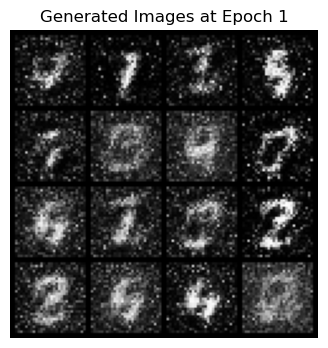

Epoch [2/250]  D Loss: 0.9451  G Loss: 2.6442
Epoch [3/250]  D Loss: 0.7212  G Loss: 1.4044
Epoch [4/250]  D Loss: 0.8173  G Loss: 1.3829
Epoch [5/250]  D Loss: 0.7637  G Loss: 2.0989
Epoch [6/250]  D Loss: 0.9284  G Loss: 1.4714
Epoch [7/250]  D Loss: 1.1260  G Loss: 0.9983
Epoch [8/250]  D Loss: 0.8834  G Loss: 1.4598
Epoch [9/250]  D Loss: 0.9871  G Loss: 1.6220
Epoch [10/250]  D Loss: 0.9470  G Loss: 1.7018
Epoch [11/250]  D Loss: 0.9488  G Loss: 1.5718


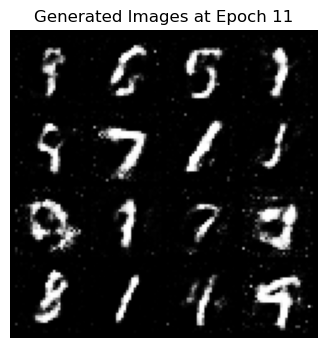

Epoch [12/250]  D Loss: 1.0531  G Loss: 1.4067
Epoch [13/250]  D Loss: 1.0090  G Loss: 1.2174
Epoch [14/250]  D Loss: 1.0497  G Loss: 1.1553
Epoch [15/250]  D Loss: 1.1178  G Loss: 1.4758
Epoch [16/250]  D Loss: 1.0427  G Loss: 1.7938
Epoch [17/250]  D Loss: 1.0615  G Loss: 1.3220
Epoch [18/250]  D Loss: 1.1172  G Loss: 1.1092
Epoch [19/250]  D Loss: 1.1330  G Loss: 1.0711
Epoch [20/250]  D Loss: 1.1585  G Loss: 1.0704
Epoch [21/250]  D Loss: 1.1862  G Loss: 1.0127


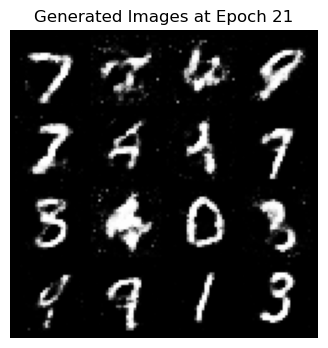

Epoch [22/250]  D Loss: 1.1707  G Loss: 1.1874
Epoch [23/250]  D Loss: 1.1273  G Loss: 1.2788
Epoch [24/250]  D Loss: 1.2376  G Loss: 1.0264
Epoch [25/250]  D Loss: 1.2254  G Loss: 1.2906
Epoch [26/250]  D Loss: 1.2065  G Loss: 1.0467
Epoch [27/250]  D Loss: 1.2132  G Loss: 1.1899
Epoch [28/250]  D Loss: 1.1831  G Loss: 1.2551
Epoch [29/250]  D Loss: 1.1884  G Loss: 1.2967
Epoch [30/250]  D Loss: 1.1681  G Loss: 1.0710
Epoch [31/250]  D Loss: 1.1605  G Loss: 1.2376


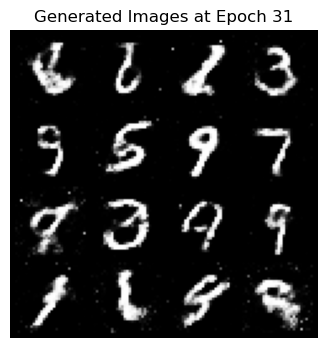

Epoch [32/250]  D Loss: 1.1815  G Loss: 1.3901
Epoch [33/250]  D Loss: 1.2570  G Loss: 0.9833
Epoch [34/250]  D Loss: 1.2866  G Loss: 1.0364
Epoch [35/250]  D Loss: 1.1165  G Loss: 1.0638
Epoch [36/250]  D Loss: 1.1472  G Loss: 1.0939
Epoch [37/250]  D Loss: 1.2237  G Loss: 1.0330
Epoch [38/250]  D Loss: 1.2050  G Loss: 1.1234
Epoch [39/250]  D Loss: 1.2400  G Loss: 1.1355
Epoch [40/250]  D Loss: 1.1811  G Loss: 1.0398
Epoch [41/250]  D Loss: 1.1680  G Loss: 0.8523


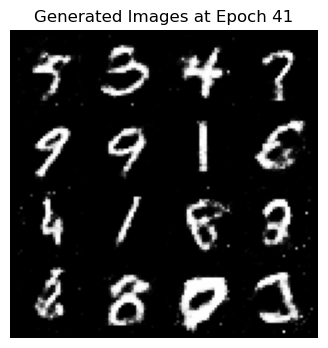

Epoch [42/250]  D Loss: 1.1628  G Loss: 1.2576
Epoch [43/250]  D Loss: 1.2035  G Loss: 1.1417
Epoch [44/250]  D Loss: 1.1656  G Loss: 1.1502
Epoch [45/250]  D Loss: 1.1432  G Loss: 1.0907
Epoch [46/250]  D Loss: 1.3079  G Loss: 1.0323
Epoch [47/250]  D Loss: 1.2721  G Loss: 0.7965
Epoch [48/250]  D Loss: 1.1799  G Loss: 1.0970
Epoch [49/250]  D Loss: 1.1761  G Loss: 1.0927
Epoch [50/250]  D Loss: 1.2798  G Loss: 0.9901
Epoch [51/250]  D Loss: 1.2159  G Loss: 0.9984


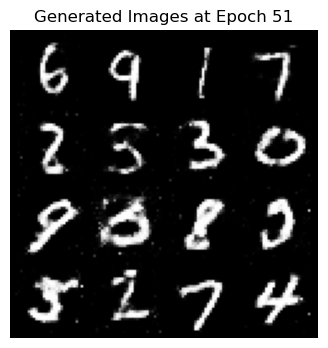

Epoch [52/250]  D Loss: 1.1958  G Loss: 1.0881
Epoch [53/250]  D Loss: 1.2389  G Loss: 1.0381
Epoch [54/250]  D Loss: 1.1492  G Loss: 1.0325
Epoch [55/250]  D Loss: 1.1924  G Loss: 0.9968
Epoch [56/250]  D Loss: 1.2311  G Loss: 1.0205
Epoch [57/250]  D Loss: 1.1502  G Loss: 1.0700
Epoch [58/250]  D Loss: 1.1668  G Loss: 1.1558
Epoch [59/250]  D Loss: 1.0952  G Loss: 0.9893
Epoch [60/250]  D Loss: 1.2175  G Loss: 1.1968
Epoch [61/250]  D Loss: 1.2012  G Loss: 1.0498


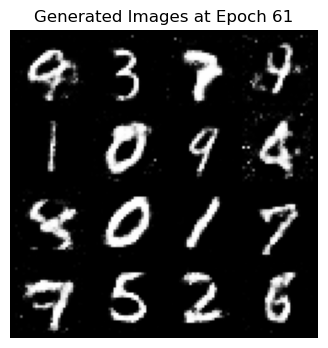

Epoch [62/250]  D Loss: 1.1764  G Loss: 0.9799
Epoch [63/250]  D Loss: 1.1340  G Loss: 1.0813
Epoch [64/250]  D Loss: 1.1912  G Loss: 1.0727
Epoch [65/250]  D Loss: 1.1993  G Loss: 1.1387
Epoch [66/250]  D Loss: 1.2278  G Loss: 0.9912
Epoch [67/250]  D Loss: 1.0900  G Loss: 1.2877
Epoch [68/250]  D Loss: 1.1528  G Loss: 1.0671
Epoch [69/250]  D Loss: 1.1932  G Loss: 1.0321
Epoch [70/250]  D Loss: 1.2214  G Loss: 1.0771
Epoch [71/250]  D Loss: 1.1865  G Loss: 0.9738


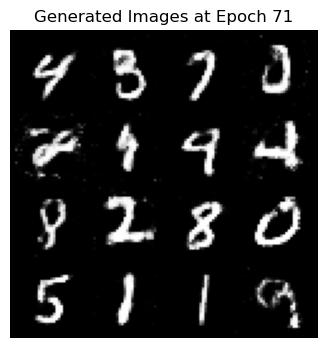

Epoch [72/250]  D Loss: 1.1473  G Loss: 1.1422
Epoch [73/250]  D Loss: 1.1455  G Loss: 0.9243
Epoch [74/250]  D Loss: 1.1755  G Loss: 1.2020
Epoch [75/250]  D Loss: 1.1559  G Loss: 1.0604
Epoch [76/250]  D Loss: 1.2134  G Loss: 1.0894
Epoch [77/250]  D Loss: 1.1509  G Loss: 1.0475
Epoch [78/250]  D Loss: 1.1382  G Loss: 1.0341
Epoch [79/250]  D Loss: 1.2024  G Loss: 1.1013
Epoch [80/250]  D Loss: 1.1444  G Loss: 0.9639
Epoch [81/250]  D Loss: 1.1443  G Loss: 1.0730


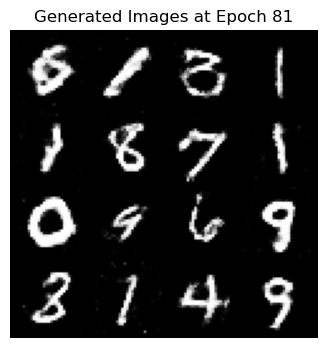

Epoch [82/250]  D Loss: 1.1310  G Loss: 1.0431
Epoch [83/250]  D Loss: 1.1844  G Loss: 1.0130
Epoch [84/250]  D Loss: 1.1419  G Loss: 1.1770
Epoch [85/250]  D Loss: 1.2044  G Loss: 1.1271
Epoch [86/250]  D Loss: 1.2107  G Loss: 1.0579
Epoch [87/250]  D Loss: 1.1995  G Loss: 1.1211
Epoch [88/250]  D Loss: 1.0660  G Loss: 1.0875
Epoch [89/250]  D Loss: 1.1226  G Loss: 1.0027
Epoch [90/250]  D Loss: 1.2114  G Loss: 1.1018
Epoch [91/250]  D Loss: 1.0913  G Loss: 1.1675


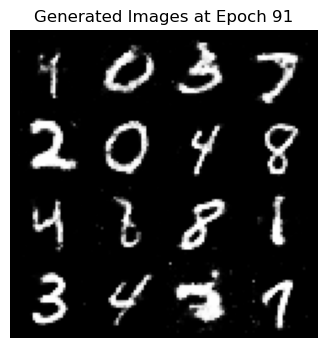

Epoch [92/250]  D Loss: 1.1750  G Loss: 1.0006
Epoch [93/250]  D Loss: 1.2244  G Loss: 1.0982
Epoch [94/250]  D Loss: 1.1324  G Loss: 1.0484
Epoch [95/250]  D Loss: 1.2172  G Loss: 1.0393
Epoch [96/250]  D Loss: 1.1706  G Loss: 1.0590
Epoch [97/250]  D Loss: 1.1765  G Loss: 1.0827
Epoch [98/250]  D Loss: 1.2135  G Loss: 1.1518
Epoch [99/250]  D Loss: 1.1773  G Loss: 0.9840
Epoch [100/250]  D Loss: 1.2503  G Loss: 1.1644
Epoch [101/250]  D Loss: 1.1761  G Loss: 1.1504


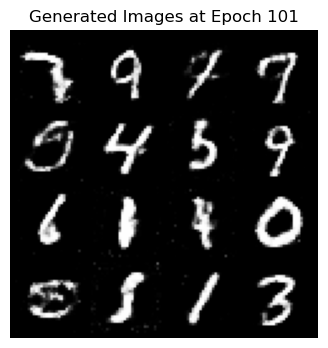

Epoch [102/250]  D Loss: 1.2116  G Loss: 1.0125
Epoch [103/250]  D Loss: 1.1614  G Loss: 1.0507
Epoch [104/250]  D Loss: 1.2635  G Loss: 1.2025
Epoch [105/250]  D Loss: 1.0988  G Loss: 0.9735
Epoch [106/250]  D Loss: 1.2105  G Loss: 1.0974
Epoch [107/250]  D Loss: 1.1564  G Loss: 1.2264
Epoch [108/250]  D Loss: 1.1612  G Loss: 1.1768
Epoch [109/250]  D Loss: 1.1614  G Loss: 1.1214
Epoch [110/250]  D Loss: 1.1615  G Loss: 1.0482
Epoch [111/250]  D Loss: 1.1072  G Loss: 1.0680


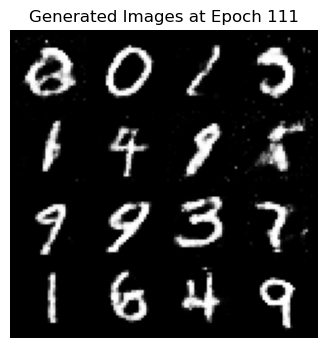

Epoch [112/250]  D Loss: 1.1843  G Loss: 1.0239
Epoch [113/250]  D Loss: 1.1418  G Loss: 1.1294
Epoch [114/250]  D Loss: 1.1399  G Loss: 1.0489
Epoch [115/250]  D Loss: 1.1757  G Loss: 1.1507
Epoch [116/250]  D Loss: 1.2467  G Loss: 1.1488
Epoch [117/250]  D Loss: 1.1168  G Loss: 1.1678
Epoch [118/250]  D Loss: 1.2294  G Loss: 1.1585
Epoch [119/250]  D Loss: 1.2355  G Loss: 1.2168
Epoch [120/250]  D Loss: 1.0841  G Loss: 1.0729
Epoch [121/250]  D Loss: 1.1345  G Loss: 1.1457


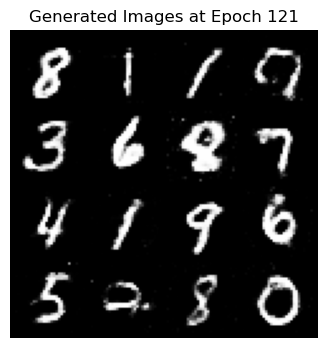

Epoch [122/250]  D Loss: 1.1718  G Loss: 1.0765
Epoch [123/250]  D Loss: 1.1956  G Loss: 1.1712
Epoch [124/250]  D Loss: 1.1066  G Loss: 1.1184
Epoch [125/250]  D Loss: 1.2210  G Loss: 1.2210
Epoch [126/250]  D Loss: 1.1265  G Loss: 1.1000
Epoch [127/250]  D Loss: 1.1764  G Loss: 1.1254
Epoch [128/250]  D Loss: 1.2752  G Loss: 1.0071
Epoch [129/250]  D Loss: 1.2382  G Loss: 1.1044
Epoch [130/250]  D Loss: 1.1635  G Loss: 1.1356
Epoch [131/250]  D Loss: 1.2277  G Loss: 1.0364


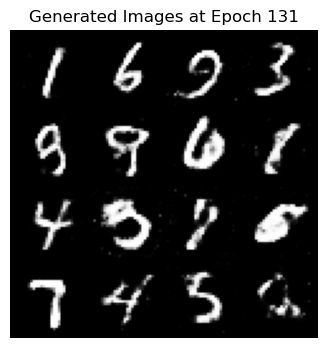

Epoch [132/250]  D Loss: 1.1101  G Loss: 1.1693
Epoch [133/250]  D Loss: 1.1544  G Loss: 1.2139
Epoch [134/250]  D Loss: 1.1328  G Loss: 1.0317
Epoch [135/250]  D Loss: 1.0579  G Loss: 1.1100
Epoch [136/250]  D Loss: 1.1985  G Loss: 1.1897
Epoch [137/250]  D Loss: 1.1526  G Loss: 1.1143
Epoch [138/250]  D Loss: 1.2205  G Loss: 1.0340
Epoch [139/250]  D Loss: 1.2339  G Loss: 1.0056
Epoch [140/250]  D Loss: 1.1910  G Loss: 1.1340
Epoch [141/250]  D Loss: 1.1600  G Loss: 1.1336


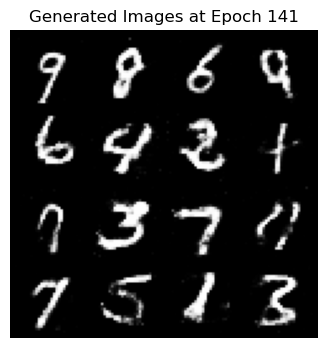

Epoch [142/250]  D Loss: 1.1135  G Loss: 1.0535
Epoch [143/250]  D Loss: 1.1532  G Loss: 1.1291
Epoch [144/250]  D Loss: 1.1387  G Loss: 1.0743
Epoch [145/250]  D Loss: 1.1448  G Loss: 1.2095
Epoch [146/250]  D Loss: 1.1914  G Loss: 1.0399
Epoch [147/250]  D Loss: 1.1999  G Loss: 1.2723
Epoch [148/250]  D Loss: 1.2018  G Loss: 1.1461
Epoch [149/250]  D Loss: 1.1318  G Loss: 1.0687
Epoch [150/250]  D Loss: 1.1250  G Loss: 1.1179
Epoch [151/250]  D Loss: 1.1639  G Loss: 1.0812


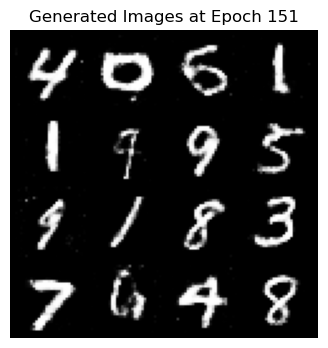

Epoch [152/250]  D Loss: 1.1252  G Loss: 1.0665
Epoch [153/250]  D Loss: 1.1619  G Loss: 1.1204
Epoch [154/250]  D Loss: 1.0750  G Loss: 1.1388
Epoch [155/250]  D Loss: 1.1442  G Loss: 1.1650
Epoch [156/250]  D Loss: 1.1104  G Loss: 1.1264
Epoch [157/250]  D Loss: 1.1814  G Loss: 1.1389
Epoch [158/250]  D Loss: 1.1637  G Loss: 1.2083
Epoch [159/250]  D Loss: 1.1878  G Loss: 1.1398
Epoch [160/250]  D Loss: 1.1463  G Loss: 1.2338
Epoch [161/250]  D Loss: 1.2216  G Loss: 1.1603


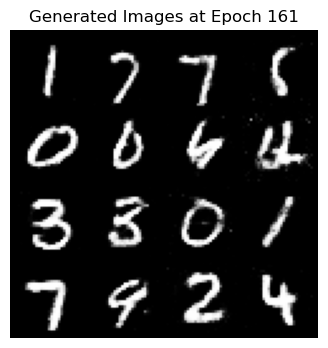

Epoch [162/250]  D Loss: 1.1657  G Loss: 1.0526
Epoch [163/250]  D Loss: 1.1512  G Loss: 1.1387
Epoch [164/250]  D Loss: 1.1625  G Loss: 1.1039
Epoch [165/250]  D Loss: 1.1700  G Loss: 1.1168
Epoch [166/250]  D Loss: 1.1350  G Loss: 1.0871
Epoch [167/250]  D Loss: 1.1122  G Loss: 1.1519
Epoch [168/250]  D Loss: 1.3116  G Loss: 1.1285
Epoch [169/250]  D Loss: 1.1882  G Loss: 1.1587
Epoch [170/250]  D Loss: 1.1681  G Loss: 1.1494
Epoch [171/250]  D Loss: 1.1423  G Loss: 1.1663


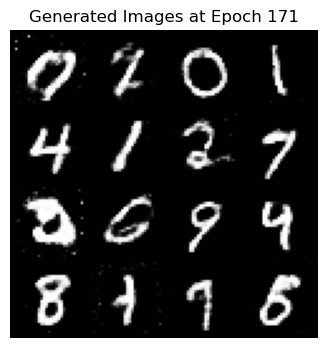

Epoch [172/250]  D Loss: 1.0895  G Loss: 1.0824
Epoch [173/250]  D Loss: 1.1417  G Loss: 1.0978
Epoch [174/250]  D Loss: 1.1766  G Loss: 0.9844
Epoch [175/250]  D Loss: 1.1447  G Loss: 1.1617
Epoch [176/250]  D Loss: 1.2345  G Loss: 1.0865
Epoch [177/250]  D Loss: 1.1940  G Loss: 1.1978
Epoch [178/250]  D Loss: 1.1563  G Loss: 1.1689
Epoch [179/250]  D Loss: 1.1555  G Loss: 1.0637
Epoch [180/250]  D Loss: 1.1219  G Loss: 1.1066
Epoch [181/250]  D Loss: 1.1501  G Loss: 1.1436


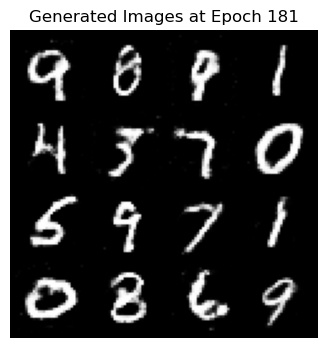

Epoch [182/250]  D Loss: 1.2761  G Loss: 1.0763
Epoch [183/250]  D Loss: 1.1268  G Loss: 1.0623
Epoch [184/250]  D Loss: 1.1887  G Loss: 1.1241
Epoch [185/250]  D Loss: 1.2317  G Loss: 1.1201
Epoch [186/250]  D Loss: 1.2482  G Loss: 1.1158
Epoch [187/250]  D Loss: 1.1457  G Loss: 1.1282
Epoch [188/250]  D Loss: 1.1704  G Loss: 1.2851
Epoch [189/250]  D Loss: 1.1232  G Loss: 1.0989
Epoch [190/250]  D Loss: 1.1564  G Loss: 1.0817
Epoch [191/250]  D Loss: 1.1754  G Loss: 1.0883


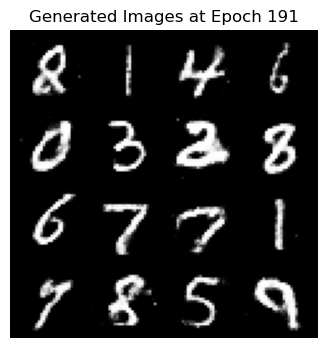

Epoch [192/250]  D Loss: 1.1173  G Loss: 1.1826
Epoch [193/250]  D Loss: 1.2161  G Loss: 1.1197
Epoch [194/250]  D Loss: 1.1470  G Loss: 1.0068
Epoch [195/250]  D Loss: 1.0833  G Loss: 1.1313
Epoch [196/250]  D Loss: 1.1557  G Loss: 1.1772
Epoch [197/250]  D Loss: 1.1793  G Loss: 1.1227
Epoch [198/250]  D Loss: 1.1401  G Loss: 1.1379
Epoch [199/250]  D Loss: 1.1337  G Loss: 1.1734
Epoch [200/250]  D Loss: 1.1772  G Loss: 1.0981
Epoch [201/250]  D Loss: 1.1316  G Loss: 1.1757


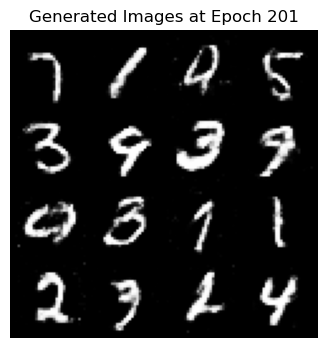

Epoch [202/250]  D Loss: 1.1516  G Loss: 1.1873
Epoch [203/250]  D Loss: 1.1783  G Loss: 1.0493
Epoch [204/250]  D Loss: 1.0853  G Loss: 1.1857
Epoch [205/250]  D Loss: 1.1328  G Loss: 1.0136
Epoch [206/250]  D Loss: 1.1669  G Loss: 1.1702
Epoch [207/250]  D Loss: 1.0824  G Loss: 1.0901
Epoch [208/250]  D Loss: 1.1755  G Loss: 1.1627
Epoch [209/250]  D Loss: 1.1031  G Loss: 1.1466
Epoch [210/250]  D Loss: 1.0720  G Loss: 1.1148
Epoch [211/250]  D Loss: 1.0767  G Loss: 1.1752


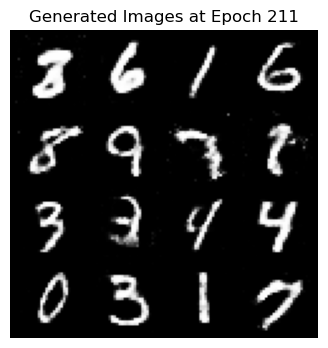

Epoch [212/250]  D Loss: 1.1020  G Loss: 1.1025
Epoch [213/250]  D Loss: 1.1213  G Loss: 1.1966
Epoch [214/250]  D Loss: 1.1419  G Loss: 1.0423
Epoch [215/250]  D Loss: 1.1194  G Loss: 1.1324
Epoch [216/250]  D Loss: 1.1953  G Loss: 1.0810
Epoch [217/250]  D Loss: 1.1577  G Loss: 1.1292
Epoch [218/250]  D Loss: 1.1925  G Loss: 1.0674
Epoch [219/250]  D Loss: 1.2323  G Loss: 1.0285
Epoch [220/250]  D Loss: 1.1490  G Loss: 1.0847
Epoch [221/250]  D Loss: 1.1801  G Loss: 1.2775


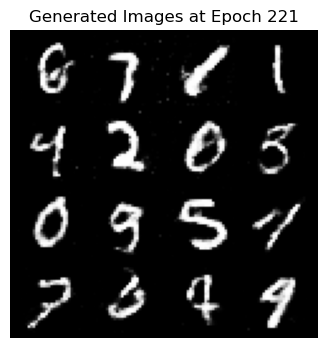

Epoch [222/250]  D Loss: 1.1739  G Loss: 1.1310
Epoch [223/250]  D Loss: 1.1245  G Loss: 1.2067
Epoch [224/250]  D Loss: 1.1422  G Loss: 1.0789
Epoch [225/250]  D Loss: 1.1733  G Loss: 1.2023
Epoch [226/250]  D Loss: 1.1819  G Loss: 1.2290
Epoch [227/250]  D Loss: 1.2125  G Loss: 1.0955
Epoch [228/250]  D Loss: 1.1012  G Loss: 1.1889
Epoch [229/250]  D Loss: 1.1489  G Loss: 1.0779
Epoch [230/250]  D Loss: 1.0420  G Loss: 1.1085
Epoch [231/250]  D Loss: 1.1226  G Loss: 1.1956


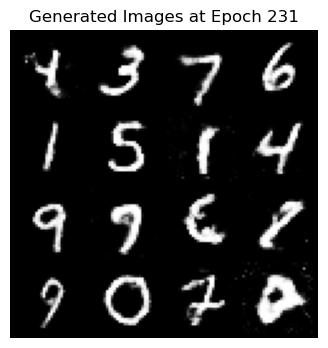

Epoch [232/250]  D Loss: 1.1551  G Loss: 1.1777
Epoch [233/250]  D Loss: 1.1734  G Loss: 1.3043
Epoch [234/250]  D Loss: 1.0930  G Loss: 1.0956
Epoch [235/250]  D Loss: 1.1026  G Loss: 1.2606
Epoch [236/250]  D Loss: 1.1741  G Loss: 1.0869
Epoch [237/250]  D Loss: 1.2072  G Loss: 1.1257
Epoch [238/250]  D Loss: 1.1175  G Loss: 1.0943
Epoch [239/250]  D Loss: 1.1162  G Loss: 1.1689
Epoch [240/250]  D Loss: 1.0889  G Loss: 1.0436
Epoch [241/250]  D Loss: 1.1102  G Loss: 1.1717


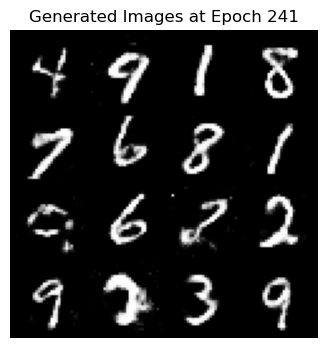

Epoch [242/250]  D Loss: 1.0827  G Loss: 1.1362
Epoch [243/250]  D Loss: 1.0903  G Loss: 1.1299
Epoch [244/250]  D Loss: 1.0928  G Loss: 1.0385
Epoch [245/250]  D Loss: 1.1818  G Loss: 1.2073
Epoch [246/250]  D Loss: 1.1384  G Loss: 1.1100
Epoch [247/250]  D Loss: 1.2154  G Loss: 1.0787
Epoch [248/250]  D Loss: 1.1089  G Loss: 1.2475
Epoch [249/250]  D Loss: 1.1396  G Loss: 1.2097
Epoch [250/250]  D Loss: 1.1643  G Loss: 1.1770


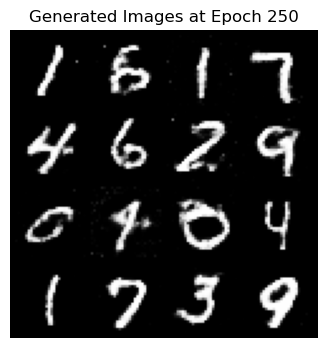

In [7]:
# Training Loop
g_losses = []
d_losses = []

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # Flatten the images and move to device
        real_imgs = imgs.view(-1, img_size).to(device)
        batch_size = real_imgs.size(0)

        # Labels for real and fake images with label smoothing
        real_labels = torch.ones(batch_size, 1).uniform_(0.9, 1.0).to(device)  # Smoothed with random values between 0.9 and 1.0
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)

        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)
        g_loss = criterion(discriminator(fake_imgs), real_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Save losses for plotting
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

    # Step the learning rate scheduler
    g_scheduler.step()
    d_scheduler.step()

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    # Visualize the generated images at certain epochs
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        with torch.no_grad():
            z = torch.randn(16, latent_dim).to(device)
            sample_imgs = generator(z).view(-1, 1, 28, 28)
            grid = torchvision.utils.make_grid(sample_imgs, nrow=4, normalize=True)
            plt.figure(figsize=(4, 4))
            plt.imshow(np.transpose(grid.cpu().numpy(), (1, 2, 0)))
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.axis("off")
            plt.show()


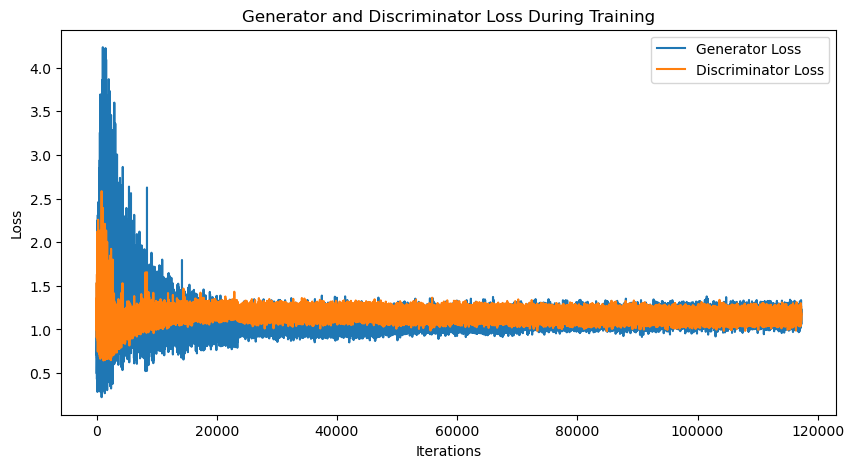

In [8]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Generator and Discriminator Loss During Training")
plt.show()


In [234]:
# Function to perform interpolation and generate images
def interpolate_and_generate(z1, z2, num_steps=10):
    # Generate interpolation steps
    alphas = np.linspace(0, 1, num_steps)
    interpolated_z = []
    for alpha in alphas:
        z = (1 - alpha) * z1 + alpha * z2
        interpolated_z.append(z)
    interpolated_z = torch.stack(interpolated_z)

    # Generate images from interpolated latent vectors
    with torch.no_grad():
        interpolated_imgs = generator(interpolated_z.to(device)).view(-1, 1, 28, 28)
    return interpolated_imgs

In [235]:
# Select two random latent vectors
z_dim = latent_dim
z1 = torch.randn(z_dim)
z2 = torch.randn(z_dim)

# Generate interpolated images
interpolated_images = interpolate_and_generate(z1, z2, num_steps=10)


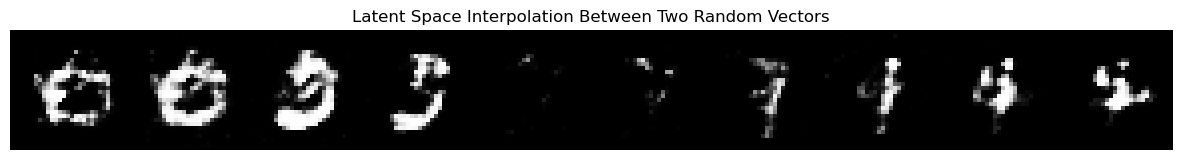

In [236]:
# Visualize the interpolated images
grid = make_grid(interpolated_images.cpu(), nrow=10, normalize=True, padding=1)
plt.figure(figsize=(15, 2))
plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
plt.title("Latent Space Interpolation Between Two Random Vectors")
plt.axis('off')
plt.show()

The interpolation between two latent vectors demonstrates smooth transitions in the generated images. Each intermediate image gradually morphs from the features of the first image to those of the second. This smoothness indicates that the generator has learned a coherent and continuous latent space, where linear interpolations produce realistic and consistent transformations.